# Import python libraries 

In [67]:


from osgeo import gdal, gdal_array # Import the "gdal" submodule from within the "osgeo" module
from osgeo import ogr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# open the raster dataset using GDAL library

In [73]:
# Open a GDAL dataset
data = gdal.Open('raster2.gtif', gdal.GA_ReadOnly)

print(data)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000021EAE7514E0> >


# Data exploration

In [74]:

bands_data = [] # initialization of numpy array
for b in range(1, data.RasterCount+1): # +1 because in python count starts with 0 while in GDAL , count starts with 1
    band = data.GetRasterBand(b)
    bands_data.append(band.ReadAsArray())

bands_data = np.dstack(bands_data)
nrows, ncols, nbands = bands_data.shape

print('Number of bands in image: {n}\n'.format(n=nbands))
print('Image dimension is: {r} rows x {c} columns\n'.format(r=nrows, c=ncols))

desc = data.GetDescription()
metadata = data.GetMetadata()
geotrans = data.GetGeoTransform()
print('geotransform: {gtrans}\n'.format(gtrans=geotrans))

print('Red band mean: {r} '.format(r=bands_data[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=bands_data[:, :, 3].mean()))
print('SWIR1 band mean: {SWIR1}'.format(SWIR1=bands_data[:, :,4 ].mean()))
print('Red band std: {r} '.format(r=bands_data[:, :, 2].std()))
print('NIR band std: {nir}'.format(nir=bands_data[:, :, 3].std()))
print('SWIR1 band std: {SWIR1}'.format(SWIR1=bands_data[:, :, 4].std()))

Number of bands in image: 8

Image dimension is: 250 rows x 250 columns

geotransform: (462405.0, 30.0, 0.0, 1741815.0, 0.0, -30.0)

Red band mean: 1460.09296 
NIR band mean: 2700.18344
SWIR1 band mean: 3380.360944
Red band std: 2065.470007791553 
NIR band std: 710.1296021415855
SWIR1 band std: 1909.8028342149428


In [ ]:
bands_data.shape

# Calculation of Normalized Difference Vegetation Index (NDVI)

In [ ]:
imagearray.shape

In [75]:
redband = 2
NIRband = 3

ndvi = (bands_data [:, :, NIRband] - bands_data [:, :, redband]) / (bands_data [:, :, redband] + bands_data [:, :, NIRband])

print(ndvi)
print(ndvi.max())

[[ 0.37269557  0.39126166  0.44422984 ...,  0.36966394  0.40647922
   0.51700087]
 [ 0.3250366   0.3498452   0.3970338  ...,  0.38437597  0.39950526
   0.42797119]
 [ 0.33222116  0.3498452   0.37306202 ...,  0.37700787  0.37754792  0.415     ]
 ..., 
 [ 0.27515723  0.27947817  0.26802586 ...,  0.29664874  0.32523851
   0.34447539]
 [ 0.28249027  0.28341426  0.27947817 ...,  0.37880738  0.36796159
   0.2972973 ]
 [ 0.29672006  0.30234934  0.28967643 ...,  0.34625551  0.31332745
   0.27264015]]
0.76764770967


# Data visulaization

Text(0,0.5,'NIR label')

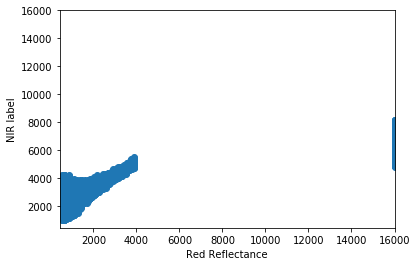

In [76]:
red_band = np.ndarray.flatten(bands_data[:, :, 2])
nir_band = np.ndarray.flatten(bands_data[:, :, 3])
swir1_band = np.ndarray.flatten(bands_data[:, :, 4])


plt.scatter(red_band, nir_band ) # scatter plot

plt.xlim(min(red_band.min(), nir_band.min()),max(red_band.max(), nir_band.max()))
plt.ylim(min(red_band.min(), nir_band.min()),max(red_band.max(), nir_band.max()))

# Add axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')



# Data Preprocessing

In [77]:
# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
wavelength = bands_data[:, :, index].astype(np.float64)

maxval = 8000
minval = 0


wavelength[wavelength[:, :, :] > maxval] = maxval
wavelength[wavelength[:, :, :] < minval] = minval

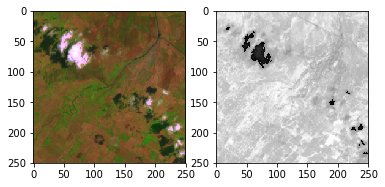

In [78]:
for i in range(wavelength.shape[2]):
    wavelength[:, :, i] = wavelength[:, :, i] * 1 / (maxval - minval)

plt.subplot(121)
plt.imshow(wavelength)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)



# Rasterize the image layers

Region of interest in this data is the polygon from vector layer, and therefore each nonzero pixel corresponds to roi. A

I have assigned integer values to ROI's ranging from 1 - 5 for the classes:

1 - forest
2 - water
3 - herbaceous
4 - barren
5 - urban



In [79]:
# Open the dataset from the file
dataset = ogr.Open('training_data.shp')

layer = dataset.GetLayerByIndex(0)    

In [ ]:
print(layer)

In [80]:
# Import GDAL
from osgeo import gdal
raster_ds = gdal.Open('raster2.gtif', gdal.GA_ReadOnly)
# number of rows and columns
cols = raster_ds.RasterXSize
rows = raster_ds.RasterYSize
proj = raster_ds.GetProjectionRef()
geo_transform = raster_ds.GetGeoTransform()

driver = gdal.GetDriverByName('GTiff')
target_ds = driver.Create('trainingdata.gtif', cols, rows, 1, gdal.GDT_Byte)
target_ds.SetProjection(proj)
target_ds.SetGeoTransform(geo_transform)

band =target_ds.GetRasterBand(1)
band.Fill(0)
layer = dataset.GetLayerByIndex(0)
status = gdal.RasterizeLayer(target_ds,  [1],  layer,  None, None, [0], ['ALL_TOUCHED=TRUE', 'ATTRIBUTE=id'])  




In [14]:
# # check the rasterized layer 
import numpy as np
roi = gdal.Open('trainingdata.gtif', gdal.GA_ReadOnly)
roiarray = roi.GetRasterBand(1).ReadAsArray()
classes = np.unique(roiarray) # number of pixels in each class
for c in classes:
    print('Class {c} contains {n} pixels'.format(c=c,
                                                 n=(roiarray == c).sum()))

Class 0 contains 61400 pixels
Class 1 contains 583 pixels
Class 2 contains 24 pixels
Class 3 contains 223 pixels
Class 4 contains 173 pixels
Class 5 contains 97 pixels


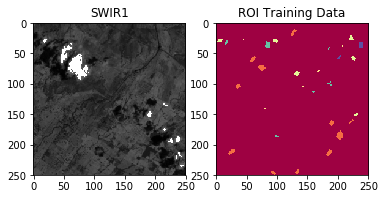

In [81]:
plt.subplot(121)
plt.imshow(bands_data[:, :, 4], cmap=plt.cm.Greys_r)
plt.title('SWIR1')

plt.subplot(122)
plt.imshow(roiarray, cmap=plt.cm.Spectral)
plt.title('ROI Training Data')
plt.show()    

In [82]:
n_observations = (roiarray > 0).sum()
print('Number of observations are {n}'.format(n=n_observations ))
classification_labels = np.unique(roiarray[roiarray > 0])   #Classfication labels
print('my data has {n} classes: {classes}'.format(n=classification_labels.size, classes=classification_labels))
X = bands_data[roiarray > 0, :7]  # I excluded 8 th band, as its just clouds
y = roiarray[roiarray > 0]

print('The dimension of observation Matrix X is : {sz}'.format(sz=X.shape))
print('The dimension of label column Y is: {sz}'.format(sz=y.shape))

Number of observations are 1100
my data has 5 classes: [1 2 3 4 5]
The dimension of observation Matrix X is : (1100, 7)
The dimension of label column Y is: (1100,)


# Training the Random Forest Classifier

Feature ranking:
1. feature 1 (0.182333)
2. feature 3 (0.178293)
3. feature 2 (0.166846)
4. feature 0 (0.158667)
5. feature 4 (0.149901)
6. feature 5 (0.083330)
7. feature 6 (0.080630)


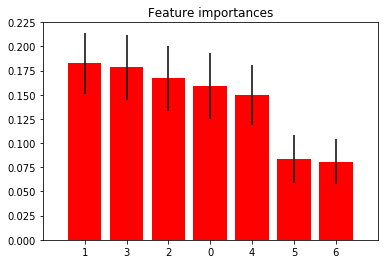

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=500,
#                            n_features=7,
#                            n_informative=5,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=5,
#                            random_state=0,
#                            shuffle=False)

# Build a forest and compute the feature importances

# Initialize our model with 500 trees
forest = RandomForestClassifier(n_estimators=500, oob_score=True)

# Fit our model to training data
forest = forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [182]:
bands = [1, 2, 3]

for b, imp in zip(bands, forest.feature_importances_):
    print('Band {b} importance: {imp}'.format(b=b, imp=imp))

Band 1 importance: 0.15866728727185922
Band 2 importance: 0.18233349390269327
Band 3 importance: 0.16684601316404207


In [66]:
# Cross-tabulate predictions
print(pd.crosstab(df['truth'], df['predict'], margins=True))

print("Confussion matrix:\n%s" %
     confusion_matrix(y, df['predict']))

target_names = ['Class %s' % s for s in classes]
print("Classification report:\n%s" %
      classification_report(y, df['predict'],
                                    target_names=target_names))
print("Training accuracy: %f" %
      accuracy_score(y, df['predict']))

predict    1   2    3    4   5   All
truth                               
1        583   0    0    0   0   583
2          0  24    0    0   0    24
3          0   0  223    0   0   223
4          0   0    0  173   0   173
5          0   0    0    0  97    97
All      583  24  223  173  97  1100
Confussion matrix:
[[583   0   0   0   0]
 [  0  24   0   0   0]
 [  0   0 223   0   0]
 [  0   0   0 173   0]
 [  0   0   0   0  97]]
Classification report:
             precision    recall  f1-score   support

    Class 0       1.00      1.00      1.00       583
    Class 1       1.00      1.00      1.00        24
    Class 2       1.00      1.00      1.00       223
    Class 3       1.00      1.00      1.00       173
    Class 4       1.00      1.00      1.00        97

avg / total       1.00      1.00      1.00      1100

Training accuracy: 1.000000


C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 6
  .format(len(labels), len(target_names))


C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\AmmuP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

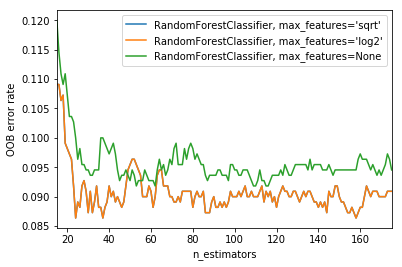

In [85]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Prediction on rest of the image

In [161]:
new_shape = (bands_data.shape[0] * bands_data.shape[1], bands_data.shape[2] - 1)

img_as_array = bands_data[:, :, :7].reshape(new_shape)
print('Reshaped from {o} to {n}'.format(o=bands_data.shape,
                                        n=img_as_array.shape))

#prediction for each pixel
prediction = rf.predict(img_as_array)
prediction = prediction.reshape(bands_data[:, :, 0].shape)

Reshaped from (250, 250, 8) to (62500, 7)


# Results

In [120]:
# Visualization

In [175]:

def colorstretch(image, index, minmax=(0, 10000)):
    colors = image[:, :, index].astype(np.float64)
    maximum = minmax[1]
    minimum = minmax[0]
    # Enforce maximum and minimum values
    colors[colors[:, :, :] > maximum] = maximum
    colors[colors[:, :, :] < minimum] = minimum
    for i in range(colors.shape[2]):
        colors[:, :, i] = colors[:, :, i] * 1 / (maximum - minimum)
    return colors
img2 = colorstretch(bands_data, [4, 3, 2], (0, 8000))
n = prediction.max()





In [176]:
colors = dict(((0, (0, 0, 0, 255)),(1, (0, 150, 0, 255)), (2, (0, 0, 255, 255)), (3, (0, 255, 0, 255)), (4, (160, 82, 45, 255)),(5, (255, 0, 0, 255)) ))

for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(1, n + 1)]
cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', 5)


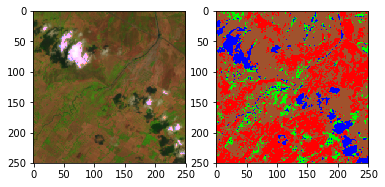

In [178]:
# Now show the classmap next to the image
plt.subplot(121)
plt.imshow(img2)

plt.subplot(122)
plt.imshow(prediction, cmap=cmap)

plt.show()